Goal: The Bank wants help with predicting/knowing whether a client will subscribe to a new term deposit.

Impact: knowing this will allow the bank to allocate resources appropriately and help with decision making.

#S1. Gather the Data

Data was provided by the bank.

Link: https://archive.ics.uci.edu/dataset/222/bank+marketing

We have already cleaned the data previously.

In [ ]:
# importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Cleaned-Bank.csv')

In [ ]:
dataset

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,Services,Married,Secondary,No,-333,Yes,No,Cellular,30,Jul,329,5,-1,0,Unknown,No
4517,57,Self-employed,Married,Tertiary,Yes,-3313,Yes,Yes,Unknown,9,May,153,1,-1,0,Unknown,No
4518,57,Technician,Married,Secondary,No,295,No,No,Cellular,19,Aug,151,11,-1,0,Unknown,No
4519,28,Blue-collar,Married,Secondary,No,1137,No,No,Cellular,6,Feb,129,4,211,3,Other,No


#S2. Understand the Data

## Observe the Features

In [ ]:
dataset

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,Services,Married,Secondary,No,-333,Yes,No,Cellular,30,Jul,329,5,-1,0,Unknown,No
4517,57,Self-employed,Married,Tertiary,Yes,-3313,Yes,Yes,Unknown,9,May,153,1,-1,0,Unknown,No
4518,57,Technician,Married,Secondary,No,295,No,No,Cellular,19,Aug,151,11,-1,0,Unknown,No
4519,28,Blue-collar,Married,Secondary,No,1137,No,No,Cellular,6,Feb,129,4,211,3,Other,No


In [ ]:
# for numerical features

dataset.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# unique labels/values in each categorical features
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col} has {dataset[col].nunique()} unique values")

Job has 12 unique values
Marital has 3 unique values
Education has 4 unique values
Default has 2 unique values
Housing has 2 unique values
Loan has 2 unique values
Contact has 3 unique values
Month has 12 unique values
Poutcome has 4 unique values
Y has 2 unique values


In [ ]:
# most frequently occuring label in each features

for col in categorical_cols:
    print(f"Most frequent category in {col} is {dataset[col].mode()[0]}")

Most frequent category in Job is Management
Most frequent category in Marital is Married
Most frequent category in Education is Secondary
Most frequent category in Default is No
Most frequent category in Housing is Yes
Most frequent category in Loan is No
Most frequent category in Contact is Cellular
Most frequent category in Month is May
Most frequent category in Poutcome is Unknown
Most frequent category in Y is No


In [ ]:
# frequency count of each features with their relative frequency(proportions)


for col in categorical_cols:
    counts = dataset[col].value_counts()  # Frequency counts
    proportions = dataset[col].value_counts(normalize=True) * 100  # Proportions in percentage
    summary_df = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Proportion (%)': proportions.values
    })
    print(f"Summary for {col}:\n")
    print(summary_df.to_string(index=False))
    print("\n")


Summary for Job:

     Category  Count  Proportion (%)
   Management    969       21.433311
  Blue-collar    946       20.924574
   Technician    768       16.987392
       Admin.    478       10.572882
     Services    417        9.223623
      Retired    230        5.087370
Self-employed    183        4.047777
 Entrepreneur    168        3.715992
   Unemployed    128        2.831232
    Housemaid    112        2.477328
      Student     84        1.857996
      Unknown     38        0.840522


Summary for Marital:

Category  Count  Proportion (%)
 Married   2797       61.866844
  Single   1196       26.454324
Divorced    528       11.678832


Summary for Education:

 Category  Count  Proportion (%)
Secondary   2306       51.006415
 Tertiary   1350       29.860650
  Primary    678       14.996682
  Unknown    187        4.136253


Summary for Default:

Category  Count  Proportion (%)
      No   4445       98.318956
     Yes     76        1.681044


Summary for Housing:

Category  Coun

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


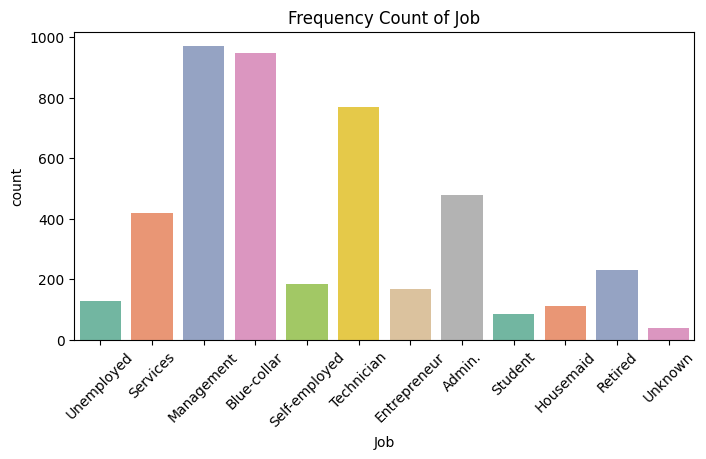

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


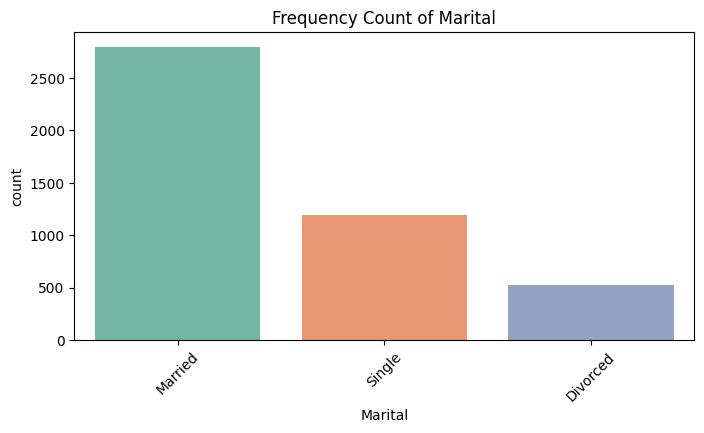

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


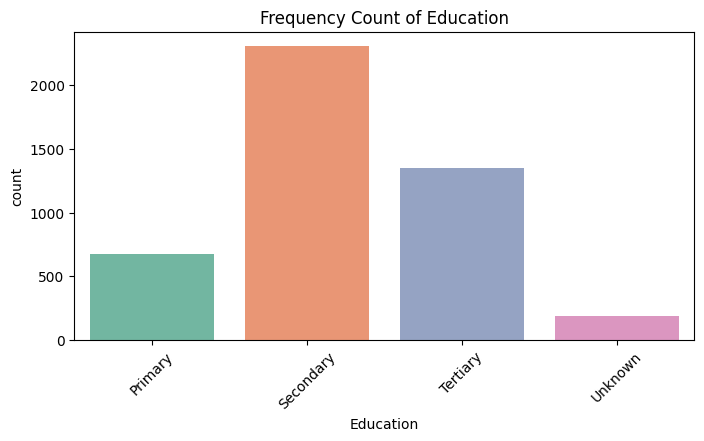

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


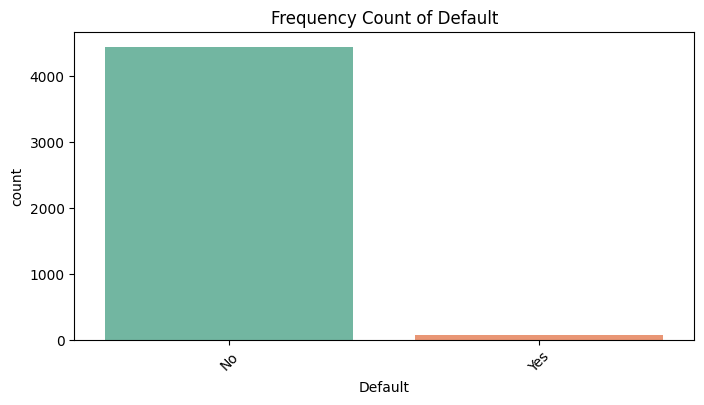

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


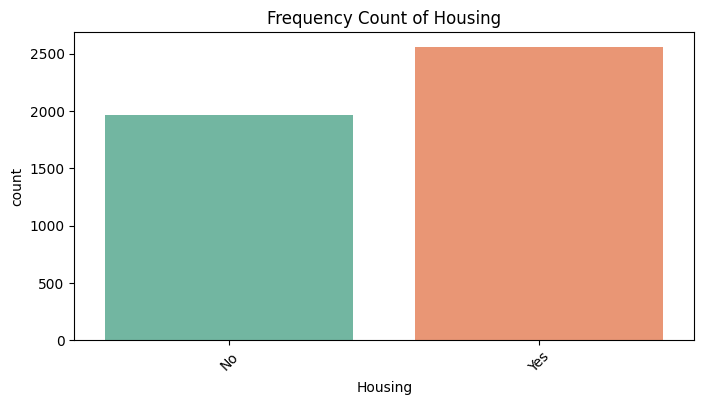

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


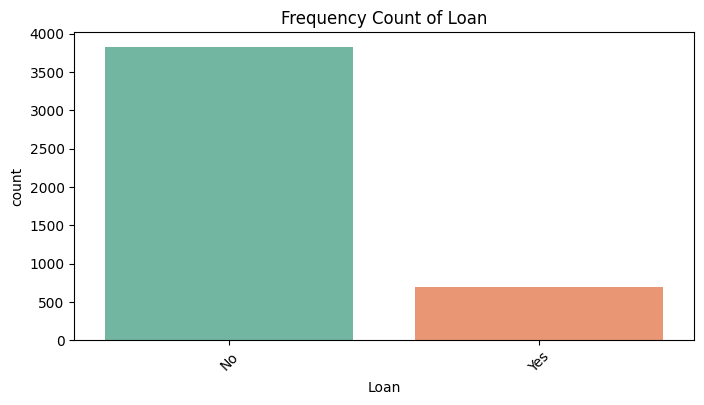

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


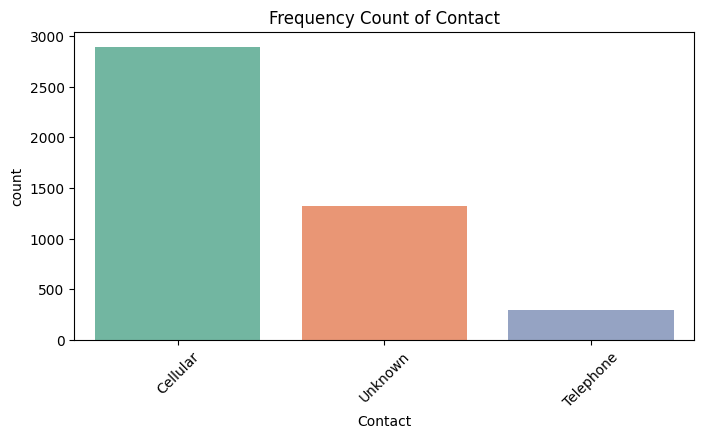

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


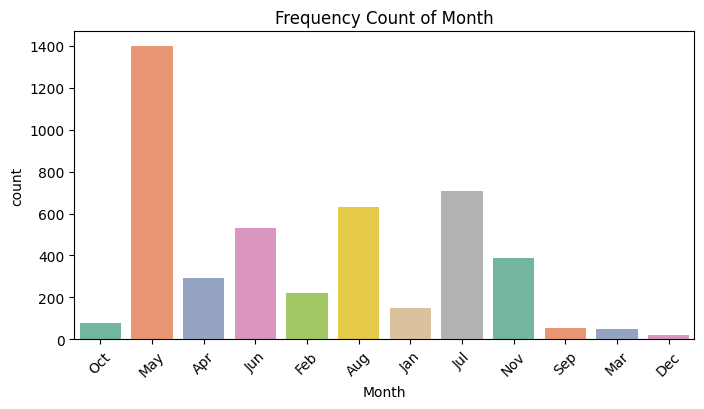

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


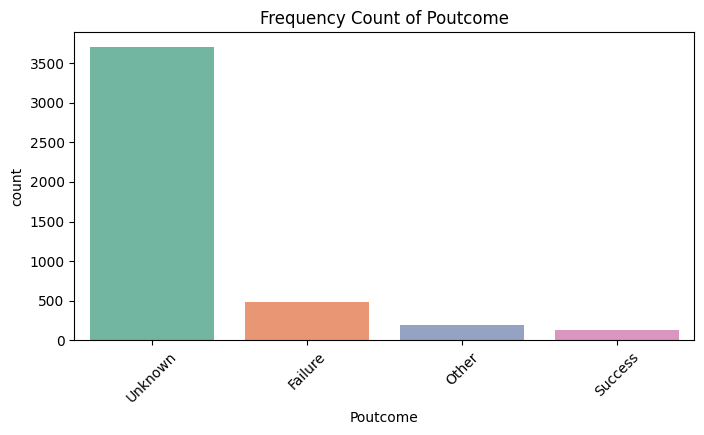

<ipython-input-20-bd3154371628>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=dataset, palette="Set2")


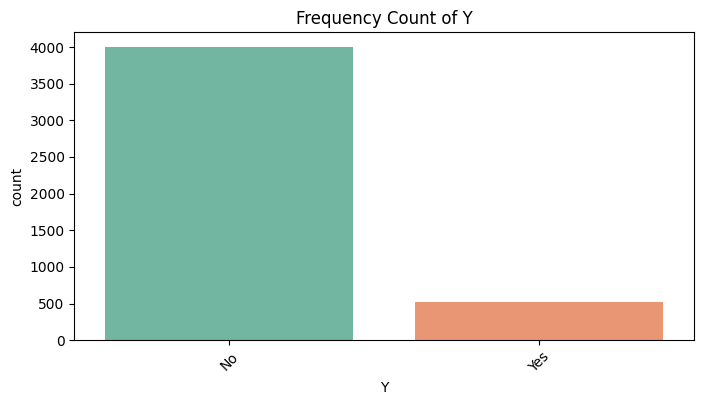

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=dataset, palette="Set2")
    plt.title(f'Frequency Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Target-Feature Relationships

## Features Distribution

## Feature Engineering

# S3. Model Selection

#S4. Model Building

#S5. Model Interpretation and Validation